In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [3]:
in_dir = 'data/'
im_name = 'metacarpals.png'
im_org = io.imread(in_dir + im_name)

In [5]:
print(im_org.shape)
print(im_org.dtype)

(512, 512)
uint8


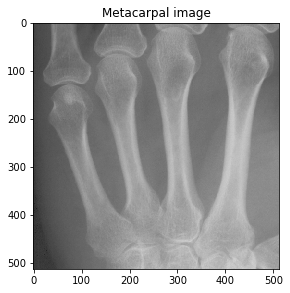

In [6]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

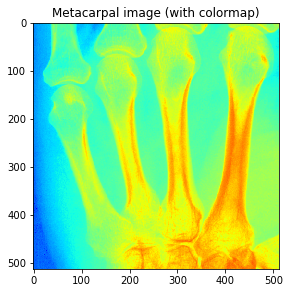

In [7]:
io.imshow(im_org, cmap='jet')
plt.title('Metacarpal image (with colormap)')
io.show()

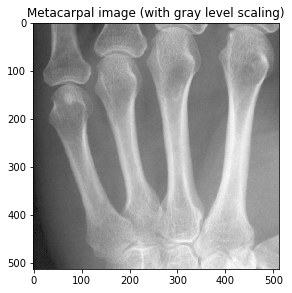

In [14]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

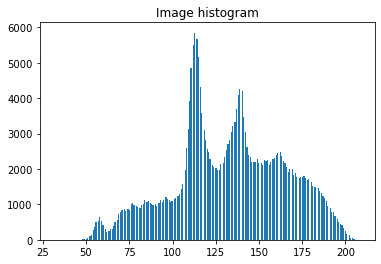

In [15]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

There are 1147.0 pixel values in bin 100


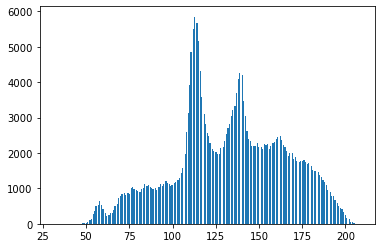

In [16]:
h = plt.hist(im_org.ravel(), bins=256)
bin_no = 100
count = h[0][bin_no]
print(f'There are {count} pixel values in bin {bin_no}')

In [17]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f'Bin edges: {bin_left} to {bin_right}')

Bin edges: 100.75 to 101.4375


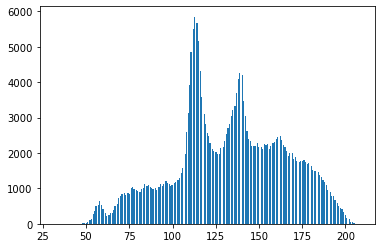

In [18]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

In [26]:
maxcount = np.max(y)
maxarg = np.argmax(y)
print(f'Max count is {maxcount} at {maxarg}')
bin_left = h[1][maxarg]
bin_right = h[1][maxarg + 1]
print(f'Bin edges: {bin_left} to {bin_right}')

Max count is 5848.0 at 117
Bin edges: 112.4375 to 113.125


In [28]:
r = 100
c = 50
im_val = im_org[r,c]
print(f'the pixel value at (r,c) = ({r}, {c}) is: {im_val}')
print(f'the pixel value at (r,c) = (110, 90) is: {im_org[110,90]}')

the pixel value at (r,c) = (100, 50) is: 108
the pixel value at (r,c) = (110, 90) is: 120


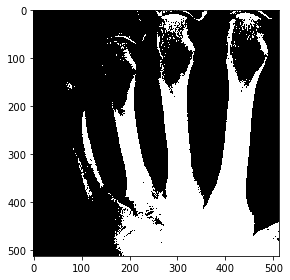

In [29]:
mask = im_org > 150
io.imshow(mask)
io.show()

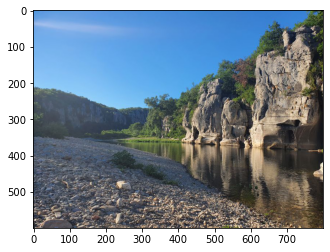

(600, 800, 3) uint8
[119 178 238]


In [35]:
im_org = io.imread(in_dir + 'ardeche.jpg')
plt.imshow(im_org)
plt.show()
print(im_org.shape, im_org.dtype)

In [36]:
r = 110
c = 90
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_org[r, c, :]}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


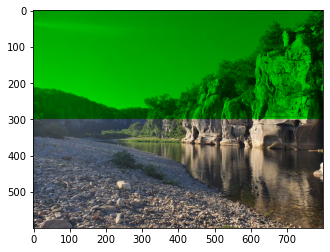

In [41]:
r2,_,_ = np.array(im_org.shape) // 2
im_org[:r2,:,[0,2]] = 0
plt.imshow(im_org)
plt.show()

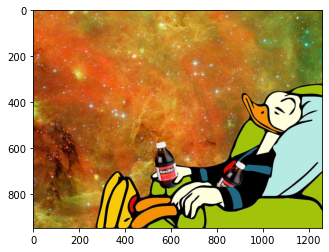

In [42]:
im_org = io.imread(in_dir + 'tiedosto.jpg')
plt.imshow(im_org)
plt.show()

In [55]:
print(im_org.shape, im_org.dtype)
print(np.min(im_org), np.max(im_org))
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)
print(image_rescaled.shape, image_rescaled.dtype)
print(np.min(image_rescaled), np.max(image_rescaled))
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)
print(image_resized.shape, image_resized.dtype)
print(np.min(image_resized), np.max(image_resized))
_,c,_ = im_org.shape
rescale_factor = 1 / (c / 400)
image_resized = rescale(im_org, rescale_factor, anti_aliasing=True, channel_axis=2)
print(image_resized.shape, image_resized.dtype)
print(np.min(image_resized), np.max(image_resized))

(947, 1259, 3) uint8
0 255
(237, 315, 3) float64
0.0 1.0
(236, 209, 3) float64
0.0 0.9999999999999999
(301, 400, 3) float64
0.0 1.0


In [54]:
im_gray = color.rgb2gray(image_resized)
im_byte = img_as_ubyte(im_gray)

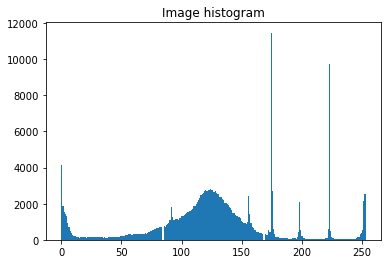

In [57]:
plt.hist(im_byte.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [58]:
im_org = io.imread(in_dir + 'DTUSign1.jpg')

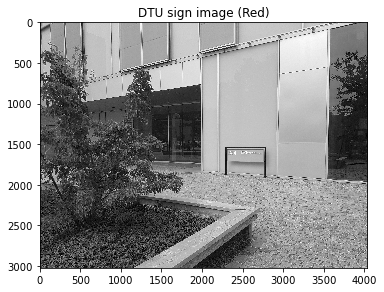

In [59]:
r_comp = im_org[:,:,0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

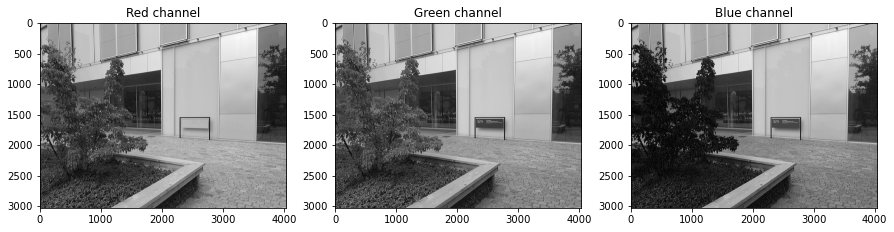

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,10))
ax[0].imshow(im_org[:,:,0], cmap = 'gray')
ax[0].set_title('Red channel')
ax[1].imshow(im_org[:,:,1], cmap = 'gray')
ax[1].set_title('Green channel')
ax[2].imshow(im_org[:,:,2], cmap = 'gray')
ax[2].set_title('Blue channel')
plt.show()

In [62]:
out_dir = 'results/'
im_org[500:1000, 800:1500, :] = 0
io.imsave(out_dir + 'DTUSign1-marked.jpg', im_org)
io.imsave(out_dir + 'DTUSign1-marked.png', im_org)
io.imsave(out_dir + 'DTUSign1-marked.tif', im_org)

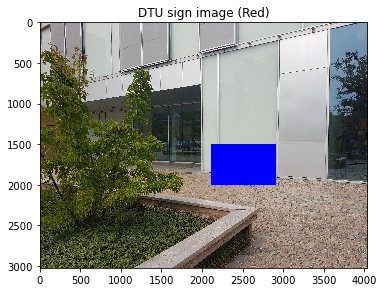

In [71]:
im_org = io.imread(in_dir + 'DTUSign1.jpg')
im_copy = im_org.copy()
im_copy[1500:2000,2100:2900,0] = 0
im_copy[1500:2000,2100:2900,1] = 0
im_copy[1500:2000,2100:2900,2] = 255
io.imshow(im_copy)
plt.title('DTU sign image (Red)')
io.show()
io.imsave(out_dir + 'DTUSign1-blue.png', im_org)

In [76]:
im_org = io.imread(in_dir + im_name)
print(im_org.shape, im_org.dtype)
im_gray = color.gray2rgb(im_org)
print(im_gray.shape, im_gray.dtype)

(512, 512) uint8
(512, 512, 3) uint8


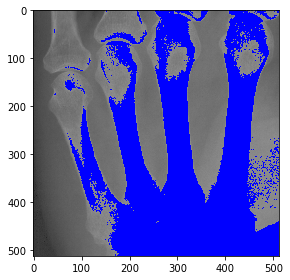

In [79]:
mask = im_org > 140
im_gray[mask, 0] = 0
im_gray[mask, 1] = 0
im_gray[mask, 2] = 255
io.imshow(im_gray)
io.show()

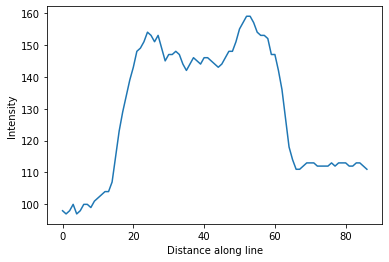

In [80]:
im_org = io.imread(in_dir + im_name)
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

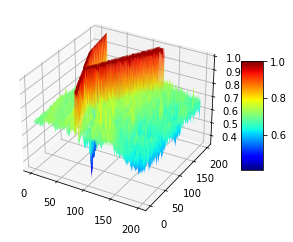

In [81]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [82]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [85]:
im = ds.pixel_array
print(im.shape, im.dtype)

(512, 512) int16


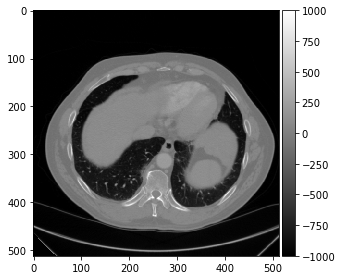

In [98]:
io.imshow(im, vmin=-1000,vmax=1000,cmap='gray')
io.show()